# Guia da Camada de Transporte
### A camada de rede tem como o objetivo de realizar o processo de envio de n qubits de Alice para Bob. De forma que este guia contém as duas funcionalidades e ferramentas.

#### IMPORTANDO AS DEPENDÊNCIAS
##### Este documento tem como objetivo demostrar a execução da camada de transporte, além de suas características.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

#### Ao importar as dependências, vamos instaciar a rede com 10 qubits em cada host e 10 pares EPRS em cada canal da topologia. 

2024-07-15 14:31:53,314: Qubit 0 adicionado à memória do Host 0.
2024-07-15 14:31:53,319: Qubit 0 criado com fidelidade inicial 0.9580686954554891 e adicionado à memória do Host 0.
2024-07-15 14:31:53,323: Qubit 1 adicionado à memória do Host 0.
2024-07-15 14:31:53,325: Qubit 1 criado com fidelidade inicial 0.6128839465148904 e adicionado à memória do Host 0.
2024-07-15 14:31:53,327: Qubit 2 adicionado à memória do Host 0.
2024-07-15 14:31:53,329: Qubit 2 criado com fidelidade inicial 0.3072087455064305 e adicionado à memória do Host 0.
2024-07-15 14:31:53,332: Qubit 3 adicionado à memória do Host 0.
2024-07-15 14:31:53,334: Qubit 3 criado com fidelidade inicial 0.8400911337075713 e adicionado à memória do Host 0.
2024-07-15 14:31:53,337: Qubit 4 adicionado à memória do Host 0.
2024-07-15 14:31:53,338: Qubit 4 criado com fidelidade inicial 0.35255141529540346 e adicionado à memória do Host 0.
2024-07-15 14:31:53,339: Qubit 5 adicionado à memória do Host 0.
2024-07-15 14:31:53,341: Qubi

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


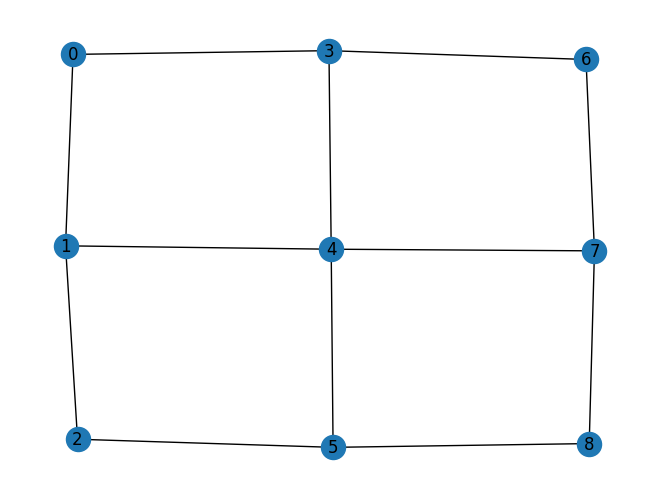

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Logo, vamos atribuir os hosts 0 e 8, respectivamente, para Alice e Bob.

In [3]:
alice = rede.get_host(0)
bob = rede.get_host(8)


##### Para haver a transmissão de um qubit de Alice para Bob, utiliza-se o método request_transmission, que dado os seus parâmetros, Alice, Bob e o número de qubits que desaja transmitir entre eles. Esse método gera uma requisição para haver a transmissão.

In [10]:
rede.transportlayer.request_transmission(0,8, 10)

2024-07-15 17:12:44,158: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,162: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,172: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,174: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,176: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,179: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,184: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,187: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,189: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,193: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 17:12:44,194: Transmissão de 10 qubits entre 0 e 8 concluída com sucesso.


True

##### Verifica-se, primeiramente, a mémoria de Alice e Bob antes da transmissão.

In [5]:
print('memoria de alice:',(alice.memory))
print('memoria de bob:',(bob.memory))

memoria de alice: [<quantumnet.objects.qubit.Qubit object at 0x7f045012fa00>, <quantumnet.objects.qubit.Qubit object at 0x7f0451fe49a0>, <quantumnet.objects.qubit.Qubit object at 0x7f0450f30af0>, <quantumnet.objects.qubit.Qubit object at 0x7f04507012b0>, <quantumnet.objects.qubit.Qubit object at 0x7f0451f8ee80>, <quantumnet.objects.qubit.Qubit object at 0x7f04506fcb80>, <quantumnet.objects.qubit.Qubit object at 0x7f045012f700>, <quantumnet.objects.qubit.Qubit object at 0x7f045012f850>, <quantumnet.objects.qubit.Qubit object at 0x7f0451f8e640>, <quantumnet.objects.qubit.Qubit object at 0x7f045012f820>]
memoria de bob: [<quantumnet.objects.qubit.Qubit object at 0x7f04504ef910>, <quantumnet.objects.qubit.Qubit object at 0x7f0453057fa0>, <quantumnet.objects.qubit.Qubit object at 0x7f045305bd90>, <quantumnet.objects.qubit.Qubit object at 0x7f045305bd30>, <quantumnet.objects.qubit.Qubit object at 0x7f045305bc10>, <quantumnet.objects.qubit.Qubit object at 0x7f045305bfd0>, <quantumnet.objects.

##### Para realizar o teletransposte de n qubits de Alice e Bob, é utilizado o protocolo de teletransporte. 

In [6]:
# rota = rede.networklayer.short_route_valid(0,8)
rede.transportlayer.teleportation_protocol(0,8)

2024-07-15 14:32:09,594: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-07-15 14:32:09,598: Teletransporte de qubit de 0 para 8 falhou.


False

##### Então, para obter as informações sobre o processo de teletransporte, por meio do método get_transmitted_qubits.

In [7]:
rede.transportlayer.get_transmitted_qubits()

[{'route': [0, 3, 6, 7, 8], 'alice_id': 0, 'bob_id': 8},
 {'route': [0, 3, 6, 7, 8], 'alice_id': 0, 'bob_id': 8},
 {'route': [0, 3, 6, 7, 8], 'alice_id': 0, 'bob_id': 8},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.9580686954554891,
  'fidelity_bob': 0.10832004107191107,
  'fidelity_route': 1.0,
  'success_prob': 0.10377804044145084,
  'qubit_alice': <quantumnet.objects.qubit.Qubit at 0x7f045012fa00>,
  'qubit_bob': <quantumnet.objects.qubit.Qubit at 0x7f045305b8b0>,
  'success': False}]

##### Logo, ao mostrar a memória de Alice e Bob, percebe-se que um qubit foi da memória de Alice para Bob.

In [8]:
print('memoria de alice:',(alice.memory))
print('memoria de bob:',(bob.memory))

memoria de alice: [<quantumnet.objects.qubit.Qubit object at 0x7f0451fe49a0>, <quantumnet.objects.qubit.Qubit object at 0x7f0450f30af0>, <quantumnet.objects.qubit.Qubit object at 0x7f04507012b0>, <quantumnet.objects.qubit.Qubit object at 0x7f0451f8ee80>, <quantumnet.objects.qubit.Qubit object at 0x7f04506fcb80>, <quantumnet.objects.qubit.Qubit object at 0x7f045012f700>, <quantumnet.objects.qubit.Qubit object at 0x7f045012f850>, <quantumnet.objects.qubit.Qubit object at 0x7f0451f8e640>, <quantumnet.objects.qubit.Qubit object at 0x7f045012f820>, <quantumnet.objects.qubit.Qubit object at 0x7f045012fa00>]
memoria de bob: [<quantumnet.objects.qubit.Qubit object at 0x7f04504ef910>, <quantumnet.objects.qubit.Qubit object at 0x7f0453057fa0>, <quantumnet.objects.qubit.Qubit object at 0x7f045305bd90>, <quantumnet.objects.qubit.Qubit object at 0x7f045305bd30>, <quantumnet.objects.qubit.Qubit object at 0x7f045305bc10>, <quantumnet.objects.qubit.Qubit object at 0x7f045305bfd0>, <quantumnet.objects.